Metoda 1. Generowanie 100 punktów z przedziału [-100,100] 

In [3]:
from random import uniform, randint
import matplotlib.pyplot as plt
import numpy as np
from time import time
import math
import copy
from IPython import display

In [4]:
def det(a,b,c):
    return (b[0]*c[1]-c[0]*b[1])-(a[0]*c[1]-a[1]*c[0])+(a[0]*b[1]-b[0]*a[1])

In [5]:
def First_generator(n=100):
    return [ (uniform(-100,100),uniform(-100,100)) for _ in range(n) ]

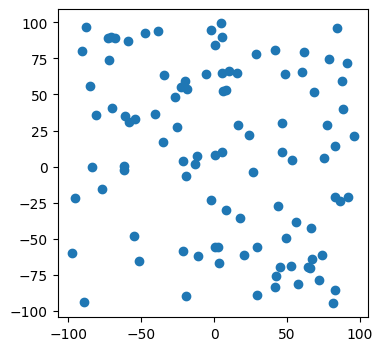

In [6]:
points1 = First_generator()
plt.figure(figsize=(4,4))
plt.scatter(*zip(*points1))
# plt.show()
plt.savefig("100_from_100_to_100.png")

Metoda 2. Okrąg o promieniu 10 i centrum (0,0)

In [7]:
def Second_generator(n=100):
    result = [ ]
    for _ in range(n):
        theta = uniform(0,2*np.pi)
        R = 10
        result.append((R*np.cos(theta),R*np.sin(theta)))
    return result

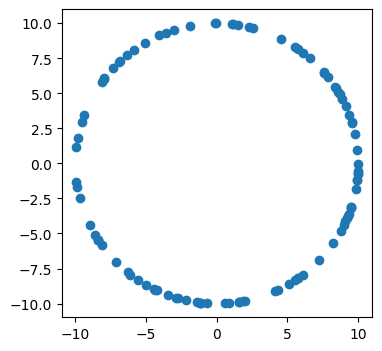

In [8]:
points2 = Second_generator()
plt.figure(figsize=(4,4))
plt.scatter(*zip(*points2))
plt.savefig("Circle_of_radius_10_center_0,0.png")

Generator 3. Boki prostokąta 

In [9]:
def Third_generator(n=100):
    result = []
    for _ in range(n):
        x = uniform(-10,10)
        if randint(0,2) % 2 == 0: 
            result.append((x,10*((-1)**randint(0,1))))
        else:
            result.append((10*((-1)**randint(0,1)),x))

    return result

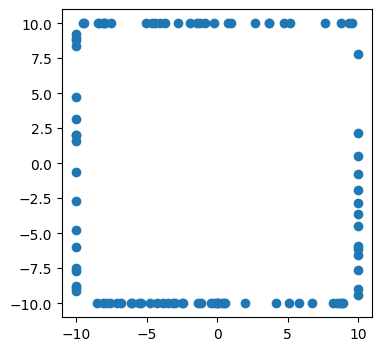

In [10]:
points3 = Third_generator()
plt.figure(figsize=(4,4))
plt.scatter(*zip(*points3))
# plt.show()
plt.savefig("10x10_square.png")

In [11]:
def Fourth_generator():
    result = [(0,0),(10,0),(0,10),(10,10)]
    for _ in range(25):
        x = uniform(0,10)
        if randint(0,2) % 2 == 0: 
            result.append((x,0))
        else:
            result.append((0,x))
    for _ in range(20):
        x = uniform(0,10)
        orientation = randint(0,1)
        result.append((x,10*orientation+x*(-1)**orientation))
    return result

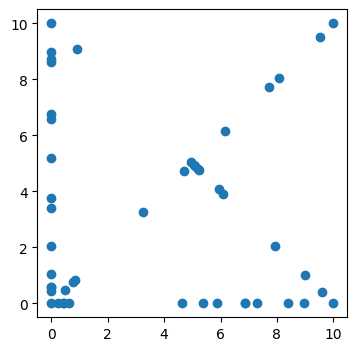

In [12]:
points4 = Fourth_generator()
plt.figure(figsize=(4,4))
plt.scatter(*zip(*points4))
plt.savefig("4_corners_OX_OY_diagonal.png")

In [ ]:
def create_tex_table(table_name,data):
    
    latex_template = r"""
\begin{table}[H]
    \renewcommand{\tablename}{Tabela}

    \centering
    \small
    \caption{Tabela różnic czasów obliczeń}
    \resizebox{\textwidth}{!}{
    \begin{tabular}{@{}lllc@{}}
        \toprule
                Ilość punktów & Algorytm Grahama &  Algorytm Jarvisa & Punkty na otoczce wypukłej 
        \\ \midrule
"""
    
    def wrap(number):
        return str(round(number,4)).replace('.',',')
    for row in data:
        value_G = row['Graham']
        value_J = row['Jarvis']
        unit_G = 'ms'
        unit_J = 'ms'
        if int(row['Graham']) >= 1000:
            unit_G = 's'
            value_G /= 1000
        if int(row['Jarvis']) >= 1000:
            unit_J = 's'
            value_J /= 1000
        graham_time = wrap(value_G) + unit_G
        jarvis_time = wrap(value_J) + unit_J
        latex_template += f"        {row['Name']} & {graham_time} & {jarvis_time} & {row['Points']}\\\\ \n"

    latex_template += r"""        \bottomrule
    \end{tabular}
}
    \label{table:generator4}
    \small
    \normalsize
\end{table}
"""

    output_filename = f"{table_name}.tex"
    with open(output_filename, "w") as f:
        f.write(latex_template)

    print(f"LaTeX table has been written to {output_filename}")


Implementacja alorytmu Grahama

In [14]:

def show_dump_hull(points, hull, name, adder):
    plt.figure(figsize=(4,4))
    
    # Plot points not in the hull in black
    for point in points:
        if point not in hull:
            plt.plot(point[0], point[1], 'ko', zorder=1)
    
    n = len(hull)
    
    with open(f"{name}_{adder}.txt", 'w') as f:
        for i in range(n):
            f.write(f"From: {hull[i]} to {hull[(i+1)%n]}\n")
            print(f"From: {hull[i]} to {hull[(i+1)%n]}")
            
            x_values = [hull[i][0], hull[(i+1) % n][0]]
            y_values = [hull[i][1], hull[(i+1) % n][1]]
            
            plt.plot(x_values, y_values, 'b-',zorder=2)
    
    with open(f"{name}_{adder}_ans.txt", 'w') as f:
            for i in range(n):
                f.write(str(hull))

    hull_x, hull_y = zip(*hull)
    plt.scatter(hull_x, hull_y, color='green', marker='o',zorder=3) 
    plt.savefig(f"Graham_{name}_{adder}.png")
    plt.close()



In [48]:
E = 1e-18
frame_count = 0
generator = 0

def merge(L, R):
    new = []
    i = j = 0
    while i < len(L) and j < len(R):
        if det((0,0),L[i],R[j]) < 0:
            new.append(L[i])
            i += 1
        else:
            new.append(R[j])
            j += 1
    new.extend(L[i:])
    new.extend(R[j:])
    return new

def radial_sort(points):
    if len(points) < 2:
        return points
    mid = len(points) // 2
    left = radial_sort(points[:mid])
    right = radial_sort(points[mid:])
    return merge(left, right)

def point_generator(n=20,x_max=100,x_min=-100,y_max=100,y_min=-100):
    return [ (uniform(x_min,x_max),uniform(y_min,y_max)) for _ in range(n) ] 

def det2x2(a,b,c):
    return ((a[0]-c[0])*(b[1]-c[1]))-((b[0]-c[0])*(a[1]-c[1]))

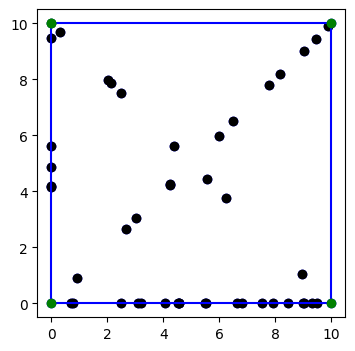

<Figure size 640x480 with 0 Axes>

From: (0, 0) to (10, 0)
From: (10, 0) to (10, 10)
From: (10, 10) to (0, 10)
From: (0, 10) to (0, 0)


In [14]:

def Graham_visualized(points,det_fun=det2x2):
    global frame_count
    global generator
    frame_count = 0
    result = []
    points = sorted(points, key=lambda p: (p[1], p[0])) 
    starting_point = points[0]
    sorted_points = sorted(points[1:], key=lambda p: math.atan2(p[1] - starting_point[1], p[0] - starting_point[0]))
    fig, ax = plt.subplots(figsize=(4,4))

    ax.set_aspect('equal','box')
    # ax.set_xlim(x_min,x_max)
    # ax.set_ylim(y_min_y_max)
    for point in points:
        ax.plot(*point, 'bo',zorder=1)
    print("Sorting points")
    points = radial_sort(points)
    print(points)
    # Start building the convex hull
    result = [starting_point, sorted_points[0]]
    p1, = ax.plot(*starting_point,'go',zorder=3)
    p2, = ax.plot(*sorted_points[0],'go',zorder=3) 
    first_line, = ax.plot([starting_point[0], sorted_points[0][0]],[starting_point[1],sorted_points[0][1]],'b-',zorder=2)
    lines_stack = [first_line]
    points_stack = [p1,p2]
    print("Creating hull")
    previous_point = starting_point 
    for i, point in enumerate(sorted_points[1:]):
        red_point, = ax.plot(*point, 'ro',zorder=4)
        display.clear_output(wait=True)
        display.display(fig)
        plt.draw()
        fig.canvas.flush_events()
        plt.pause(0.01)
        # plt.savefig(f"Graham_{generator}_{frame_count}.png")
        frame_count += 1
        d = det_fun(result[-2], result[-1], point)
        while len(result) > 1 and (d < -E or (d > -E and d < E)):
            display.clear_output(wait=True)
            display.display(fig)
            plt.draw()
            fig.canvas.flush_events()
            plt.pause(0.01)
            # plt.savefig(f"Graham_{generator}_{frame_count}.png")
            frame_count += 1
            points_stack[-1].remove()
            lines_stack[-1].remove()
            lines_stack.pop()
            points_stack.pop()
            ax.plot(*result[-1],'ko',zorder=1) 
            result.pop()
            if len(result) <= 1:
                break
            d = det_fun(result[-2], result[-1], point)
        red_point.remove()
        line, = ax.plot([point[0], result[-1][0]], [point[1], result[-1][1]],'b-',zorder=2)
        lines_stack.append(line)
        result.append(point)
        p, = ax.plot(*point,'go',zorder=3)
        points_stack.append(p)
        display.clear_output(wait=True)
        display.display(fig)
        plt.draw()
        fig.canvas.flush_events()
        plt.pause(0.01)
        frame_count += 1
    # Final connection to close the hull
    line, = ax.plot([result[-1][0], result[0][0]], [result[-1][1], result[0][1]], 'b-',zorder=2)
    ax.plot(*result[-1], 'go',zorder=3)
    
    plt.draw()
    fig.canvas.flush_events()
    display.clear_output(wait=True)
    display.display(fig)
    plt.pause(0.2)
    
    return result

points_set = [(points1,"Gen1"),(points2,"Gen2"),(points3,"Gen3"),(points4,"Gen4")]

adder="_Graham"

for points, fname in points_set:
    generator += 1
    hull = Graham_visualized(points)
    with open(fname+adder+"_ans.txt","w") as f:
        f.write(str(hull))
    show_dump_hull(points,hull,fname,adder)

Implementacja algorytmu Jarvisa

In [ ]:
def squared_distance(a, b):
    return (a[0] - b[0])**2 + (a[1] - b[1])**2

E = 1e-18
frame_count = 0
def follows(prev, current, next,det_fun=det):
    d = det_fun(prev, current, next)
    if d < -E:
        return True  
    if d > E:
        return False
    return squared_distance(prev, current) < squared_distance(prev, next)

def choose_next(points, last, current, fig, ax,det_fun=det):
    act = current
    prevline = None
    for point in points:
        p, = ax.plot(*point, 'ro',zorder=2)
        if act == last or follows(last, act, point,det_fun=det_fun):
            if act != current:
                ax.plot(*act, 'bo',zorder=1) 
            line, = ax.plot([last[0], act[0]], [last[1], act[1]],'b-',zorder=2)
            if prevline is not None:
                prevline.remove()
            prevline = line
            act = point
            display.clear_output(wait=True)
            display.display(fig)
            plt.draw()
            plt.pause(0.02)
        p.remove()
    if prevline is not None:
        prevline.remove()
    return act

In [2]:
def Jarvis(points,det_fun=det):
    points_set = copy.deepcopy(points)
    fig, ax = plt.subplots()
    ax.set_aspect('equal','box')
    for point in points:
        ax.plot(*point, 'bo',zorder=1)
    start = min(points_set, key=lambda x: (x[1], x[0]))  
    hull = [start]
    
    current_point = start
    
    while True:
        next_point = choose_next(points_set, hull[-1], current_point, fig, ax,det_fun=det_fun)
        ax.plot(*next_point, 'ko',zorder=1)
        display.clear_output(wait=True)
        display.display(fig)
        plt.draw()
        plt.pause(0.2)
        if next_point == start:
            ax.plot(*next_point,'go',zorder=3)
            break  # Completed the hull
        line, = ax.plot([next_point[0], hull[-1][0]], [next_point[1], hull[-1][1]],'b-',zorder=2)
        hull.append(next_point)
        current_point = next_point
        ax.plot(*next_point, 'go',zorder=3)
        display.clear_output(wait=True)
        display.display(fig)
        plt.draw()
        plt.pause(0.2)
    line, = ax.plot([next_point[0], hull[-1][0]], [next_point[1], hull[-1][1]],'b-',zorder=2)
    hull.append(next_point)
    ax.plot(*next_point, 'go',zorder=3)
    display.clear_output(wait=True)
    display.display(fig)
    plt.draw()
    plt.pause(0.2)
    return hull

# Define multiple point sets for testing
points_set = [(points1,"Gen1"),(points2,"Gen2"),(points3,"Gen3"),(points4,"Gen4")]
adder = "Jarvis"
# Calculate and plot hulls for each point set
for points, fname in points_set:
    hull = Jarvis(points)
    # hull, time = Jarvis_timed(points)
    
    show_dump_hull(points, hull, name=fname, adder=adder)


NameError: name 'det' is not defined

In [35]:


def Graham_timed(points,det_fun=det):
    result = []
    points = sorted(points, key=lambda p: (p[1], p[0])) 
    starting_point = points[0]
    sorted_points = sorted(points[1:], key=lambda p: math.atan2(p[1] - starting_point[1], p[0] - starting_point[0]))
    print("Sorting points")
    points = radial_sort(points)
    result = [starting_point, sorted_points[0]]
    print("Creating hull")
    start = time()
    previous_point = starting_point 
    for i, point in enumerate(sorted_points[1:]):
        d = det_fun(result[-2], result[-1], point)
        while len(result) > 1 and d < -E or (d > -E and d < E):
            result.pop()
            if len(result) <= 1:
                break
            d = det_fun(result[-2], result[-1], point)
        result.append(point)
    finish = time()

    print(f"Finished after {finish - start} seconds")
    runtime = finish - start
    print(result)
    return result, runtime


def follows(prev, current, next,det_fun=det):
    d = det_fun(prev, current, next)
    if d < -E:
        return True  
    if d > E:
        return False
    return squared_distance(prev, current) < squared_distance(prev, next)


def choose_next_time(points, last, current, det_fun=det):
    act = current
    for point in points:
        if act == last or follows(last, act, point,det_fun=det_fun):
            act = point
    return act

def Jarvis_timed(points,det_fun=det):
    points_set = copy.deepcopy(points)
    print("Starting Jarvis")
    start = time()
    startPoint = min(points_set, key=lambda x: (x[1], x[0]))  
    current_point = startPoint
    hull = [startPoint]        
    while True:
        next_point = choose_next_time(points_set, hull[-1], current_point,det_fun=det_fun)
        if next_point == startPoint:
            break  # Completed the hull
        hull.append(next_point)
        current_point = next_point
    finish = time()
    runtime = finish - start
    print(f"Finished after {runtime} seconds")
    return hull, runtime




In [18]:
# Define multiple point sets for testing
points_set = [(points1,"Pierwszy"),(points2,"Drugi"),(points3,"Trzeci"),(points4,"Czwarty")]
data = []


for points, name in points_set:

    Graham_hull, time_g = Graham_timed(points)
    Jarvis_hull, time_j = Jarvis_timed(points)
    if sorted(Graham_hull) != sorted(Jarvis_hull):
        print("================ ROZBIEŻNOŚĆ ================")
    data.append({"Name":name , "Graham":time_g*1000, "Jarvis":time_j*1000,"Points":len(Graham_hull)})
    create_tex_table("Wyniki",data) 

Sorting points
Creating hull
Finished after 0.0 seconds
[(81.67721232201973, -94.66181847335871), (82.98983244693585, -85.18543466773846), (91.74236612817924, -21.242595779122624), (95.8454963312021, 21.11962857560161), (91.01320069804467, 71.71923488228637), (84.26867227009063, 95.84042197963745), (4.964841328716702, 99.32377615623778), (-87.92609525222517, 96.51406267904858), (-90.53021246471747, 80.05731444959864), (-97.72357711921624, -59.92919531825247), (-89.0532635349195, -93.509529899482)]
Starting Jarvis
LaTeX table has been written to Wyniki.tex
Sorting points
Creating hull
Finished after 0.0 seconds
[(np.float64(0.6180820376110152), np.float64(-9.98088045188312)), (np.float64(0.8422287019245628), np.float64(-9.964469419575458)), (np.float64(1.5627993185249949), np.float64(-9.877128038555428)), (np.float64(1.564997481766276), np.float64(-9.87677998550465)), (np.float64(1.8316005781256601), np.float64(-9.830831059590524)), (np.float64(2.0400972750135624), np.float64(-9.7896886

In [36]:
def csv_dump(table_name,data):
    
    content = "Ilość punktów dla zbioru; Czas obliczeń dla algorytmu Grahama (ms);Czas obliczeń dla algorytmu Jarvisa (ms);Punkty na otoczce\n"
    
    def wrap(number):
        return str(round(number,4)).replace('.',',')
    for row in data:
        value_G = row['Graham']
        value_J = row['Jarvis']
        graham_time = wrap(value_G)
        jarvis_time = wrap(value_J)
        content = content + f"{row['Name']};{graham_time};{jarvis_time};{row['Points']}\n"
    output_filename = f"{table_name}.csv"
    with open(output_filename, "w") as f:
        f.write(content)

    print(f"CSV data table has been written to {output_filename}")

def create_tex_table_n(table_name,data):
    
    latex_template = r"""
\begin{table}[H]
    \renewcommand{\tablename}{Tabela}

    \centering
    \small
    \caption{Tabela różnic czasów obliczeń dla algorytmu Grahama i Jarvisa dla zmodyfikowanego zbioru}
    \resizebox{\textwidth}{!}{
    \begin{tabular}{@{}lllc@{}}
        \toprule
                Ilość punktów & Algorytm Grahama &  Algorytm Jarvisa & Punkty na otoczce wypukłej 
        \\ \midrule
"""
    def wrap(number):
        return str(round(number,4)).replace('.',',')
    for row in data:
        value_G = row['Graham']
        value_J = row['Jarvis']
        unit_G = 'ms'
        unit_J = 'ms'
        if int(row['Graham']) >= 1000:
            unit_G = 's'
            value_G /= 1000
        if int(row['Jarvis']) >= 1000:
            unit_J = 's'
            value_J /= 1000
        graham_time = wrap(value_G) + unit_G
        jarvis_time = wrap(value_J) + unit_J
        latex_template += f"        {row['Name']} & {graham_time} & {jarvis_time} & {row['Points']}\\\\ \n"

    latex_template += r"""        \bottomrule
    \end{tabular}
}
    \label{table:generator4}
    \small
    \normalsize
\end{table}
"""

    output_filename = f"{table_name}.tex"
    with open(output_filename, "w") as f:
        f.write(latex_template)

    print(f"LaTeX table has been written to {output_filename}")


In [ ]:
# Dla zwiększających się wartości n na przedziale [-1000,1000]
def First_generator_modified(n=100,x_interval=(-1000,1000),y_interval=(-1000,1000)):
    x_min, x_max = x_interval
    y_min, y_max = y_interval
    return [ (uniform(x_min,x_max),uniform(y_min,y_max)) for _ in range(n) ]

# points_set = []

# for i in range(2,7):
#     points_set.append((First_generator_modified(n=pow(10,i)),f"1e{i}"))

# data = []

# for points, name in points_set:
#     print(name)
#     Graham_hull, time_g = Graham_timed(points)
#     Jarvis_hull, time_j = Jarvis_timed(points)
#     if len(Graham_hull) != len(Jarvis_hull):
#         print("================ ROZBIEŻNOŚĆ ================")
#         print(Graham_hull)
#         print(Jarvis_hull) 
#     data.append({"Name":name , "Graham":time_g*1000, "Jarvis":time_j*1000,"Points":len(Jarvis_hull)})
#     create_tex_table_n("Wyniki_wykładniczo_1",data) 
#     csv_dump("Wyniki_wykładniczo_1",data)

# points_set = []

for i in range(10000,70000,5000):
    print(i)
    points_set.append((First_generator_modified(i),f"{i}"))

data = []

for points, name in points_set:
    print(name)
    Graham_hull, time_g = Graham_timed(points)
    Jarvis_hull, time_j = Jarvis_timed(points)
    if len(Graham_hull) != len(Jarvis_hull):
        print("================ ROZBIEŻNOŚĆ ================")
        print(Graham_hull)
        print(Jarvis_hull) 
    data.append({"Name":name , "Graham":time_g*1000, "Jarvis":time_j*1000, "Points":len(Jarvis_hull)})
    create_tex_table_n("Wyniki_liniowo_1",data) 
    csv_dump("Wyniki_liniowo_1",data)



1e2
Sorting points
Creating hull
Finished after 0.0 seconds
[(171.5257012163138, -977.4154074487411), (888.2322644964222, -966.799656731189), (984.0603432191126, -288.95335444948887), (871.7331844938506, 771.1901778471204), (838.4505277001899, 893.1557323117113), (698.5115549325162, 995.8287821393869), (-701.0242199193431, 995.8702517990641), (-830.8815863455936, 818.6325543741805), (-946.6816858000906, 451.2084793500194), (-984.9169175466144, -116.34483716058503), (-984.6446587288722, -190.9953791911414), (-977.8403526266561, -456.1015860749138), (-912.4149479483108, -738.7275916222786), (-874.563776955956, -784.9521636623016)]
Starting Jarvis
LaTeX table has been written to Wyniki_wykładniczo_1.tex
CSV data table has been written to Wyniki_wykładniczo_1.csv
1e3
Sorting points
Creating hull
Finished after 0.0 seconds
[(-416.3007675026722, -999.1420494774286), (522.9199182315738, -998.8499708973344), (730.0619565101874, -992.1635848794292), (800.0490438242812, -989.0575869319694), (950

In [ ]:
E = 1e-18
def Second_generator_modified(n=100,center=(0,0),R=10):
    result = [ ]
    x_center, y_center = center
    for _ in range(n):
        theta = uniform(0,2*np.pi)
        result.append((x_center+R*np.cos(theta),y_center+R*np.sin(theta)))
    return result


points_set = []

data = []

points_set = []

for i in range(500,4000,500):
    print(i)
    points_set.append((Second_generator_modified(i),f"{i}"))

data = []

for points, name in points_set:
    print(name)
    Graham_hull, time_g = Graham_timed(points)
    Jarvis_hull, time_j = Jarvis_timed(points)
    data.append({"Name":name , "Graham":time_g*1000, "Jarvis":time_j*1000,"Points":len(Jarvis_hull)})
    create_tex_table_n("Wyniki_liniowo_2",data) 
    csv_dump("Wyniki_liniowo_2",data)



500
1000
1500
2000
2500
3000
3500
500
Sorting points
Creating hull
Finished after 0.0 seconds
[(np.float64(0.007342098706035744), np.float64(-9.999997304678965)), (np.float64(0.05367334603980722), np.float64(-9.999855957558832)), (np.float64(0.2695933856185157), np.float64(-9.996365309772886)), (np.float64(0.2887689826275851), np.float64(-9.995829754186104)), (np.float64(0.41517468054528395), np.float64(-9.99137778209963)), (np.float64(0.41624168861927324), np.float64(-9.991333387324005)), (np.float64(0.5376731740093612), np.float64(-9.985534915964728)), (np.float64(0.6574471415585427), np.float64(-9.978364758619344)), (np.float64(0.7879623828307036), np.float64(-9.968907426756644)), (np.float64(0.9087411162357661), np.float64(-9.958623880017889)), (np.float64(0.9305871852329619), np.float64(-9.956606223542245)), (np.float64(1.0671909459931774), np.float64(-9.94289210867694)), (np.float64(1.3134778124061297), np.float64(-9.913363507726165)), (np.float64(1.524896230510142), np.float64(-

10000


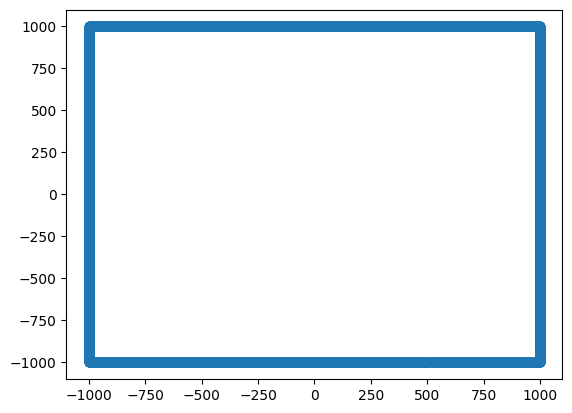

15000


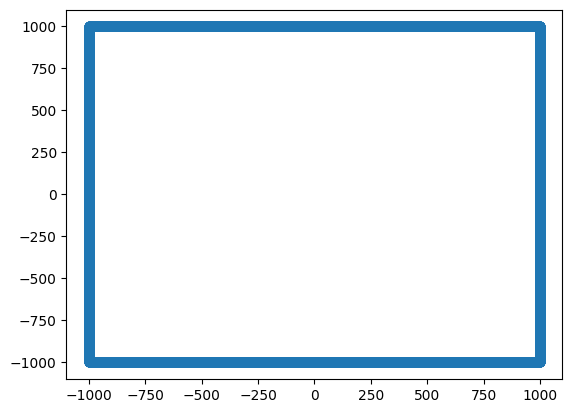

20000


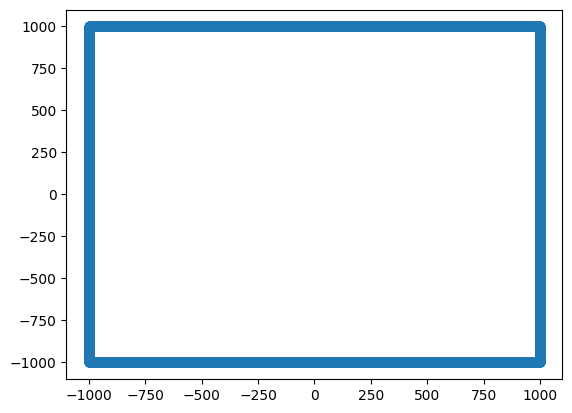

25000


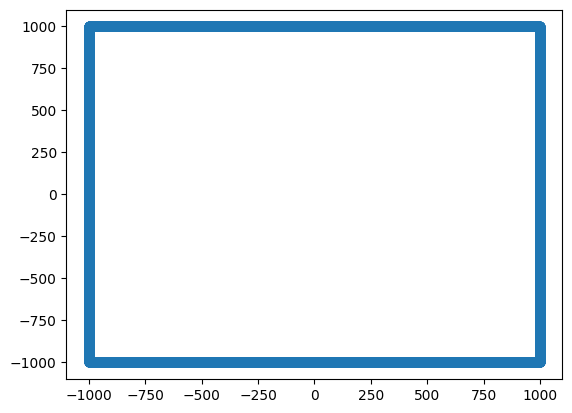

30000


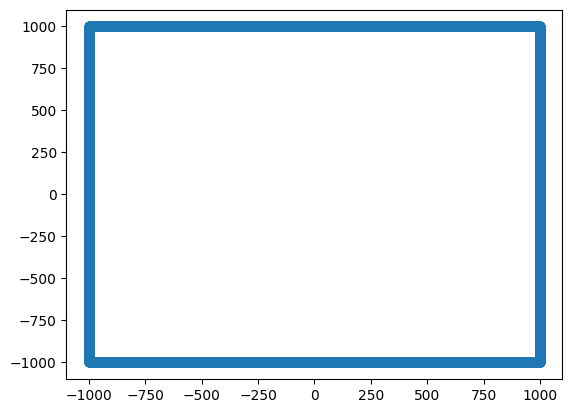

35000


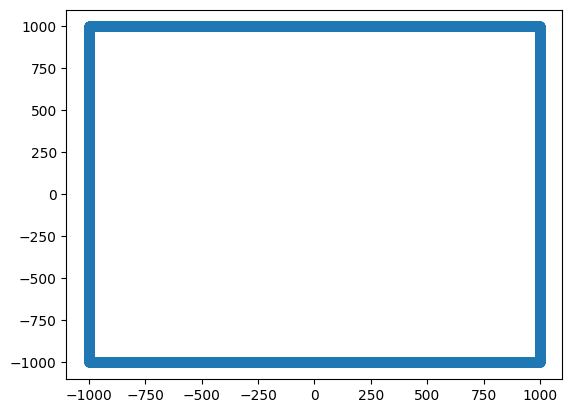

40000


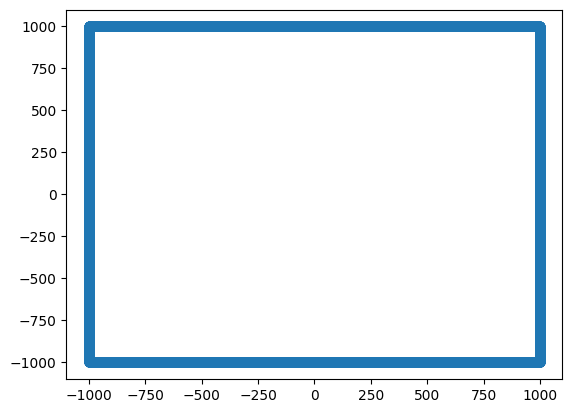

45000


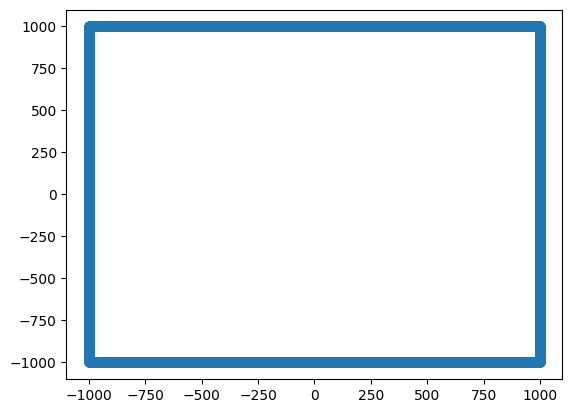

50000


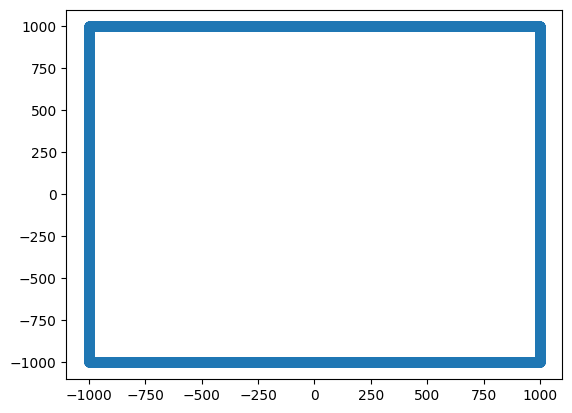

55000


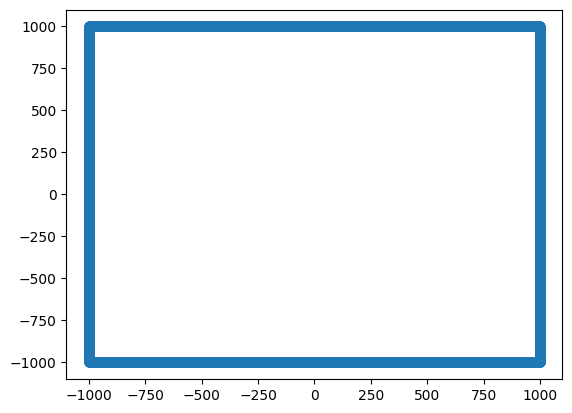

10000
Sorting points
Creating hull
Finished after 0.015004396438598633 seconds
[(-999.7666951748831, -1000), (999.9693163275599, -1000), (1000, -999.3149898906238), (1000, 999.8997724578389), (999.7660082648717, 1000), (-999.7626865527218, 1000), (-1000, 999.3057317467346), (-1000, -998.6610199754004)]
Starting Jarvis
Finished after 0.09944558143615723 seconds
LaTeX table has been written to Wyniki_liniowo_3.tex
CSV data table has been written to Wyniki_liniowo_3.csv
15000
Sorting points
Creating hull
Finished after 0.0212099552154541 seconds
[(-999.3633380306353, -1000), (999.5945046561596, -1000), (1000, -999.6735794319732), (1000, 999.2884639394192), (999.804180648287, 1000), (-999.9042646107341, 1000), (-1000, 999.5208148778547), (-1000, -999.4043655875575)]
Starting Jarvis
Finished after 0.09700131416320801 seconds
LaTeX table has been written to Wyniki_liniowo_3.tex
CSV data table has been written to Wyniki_liniowo_3.csv
20000
Sorting points
Creating hull
Finished after 0.0290288

In [ ]:
#  wartości na przedziale [-1000,1000]
def Third_generator_modified(n=100,lowerLeft = (-1000,-1000),upperRight = (1000,1000)):
    x_min,y_min = lowerLeft
    x_max,y_max = upperRight 
    result = []
    dy = y_max - y_min
    dx = x_max - x_min
    for _ in range(n):
        point = uniform(0,2*dy+2*dx)
        if point <= dx:
            result.append((x_min+point,y_min))
        elif point <= dy + dx:
            result.append((x_max,y_min+point-dx))
        elif point <= 2*dx + dy:
            result.append((x_min+point-dx-dy,y_max))
        else:
            result.append((x_min,y_min+point-2*dx-dy))
    plt.scatter(*zip(*result))
    plt.show()

    # for _ in range(n):
    #     x = uniform(-10,10)
    #     if randint(0,2) % 2 == 0: 
    #         result.append((x,10*((-1)**randint(0,1))))
    #     else:
    #         result.append((10*((-1)**randint(0,1)),x))

    return result

# points_set = []

# for i in range(1,6):
#     points_set.append((Third_generator_modified(pow(10,i)),f"1e{i}"))

# data = []

# for points, name in points_set:
#     print(name)
#     Graham_hull, time_g = Graham_timed(points)
#     Jarvis_hull, time_j = Jarvis_timed(points)
#     if len(Graham_hull) != len(Jarvis_hull):
#         print("================ ROZBIEŻNOŚĆ ================")
#         print(Graham_hull)
#         print(Jarvis_hull) 
#     data.append({"Name":name , "Graham":time_g*1000, "Jarvis":time_j*1000,"Points":len(Jarvis_hull)})
#     create_tex_table_n("Wyniki_wykładniczo_3",data) 
#     csv_dump("Wyniki_wykładniczo_3",data)
E = 1e-24

points_set = []

for i in range(10000,60000,5000):
    print(i)
    points_set.append((Third_generator_modified(i),f"{i}"))

data = []

for points, name in points_set:
    print(name)
    Graham_hull, time_g = Graham_timed(points)
    Jarvis_hull, time_j = Jarvis_timed(points)
    data.append({"Name":name , "Graham":time_g*1000, "Jarvis":time_j*1000,"Points":len(Jarvis_hull)})
    create_tex_table_n("Wyniki_liniowo_3",data) 
    csv_dump("Wyniki_liniowo_3",data)



In [ ]:
#  wartości na przedziale [-1000,1000]
def Fourth_generator_modified(n=100,m=100,lowerLeft = (-25,-25),upperRight = (10,10)):
    x_min,y_min = lowerLeft
    x_max,y_max = upperRight 
    result = [(x_min,y_min),(x_min,y_max),(x_max,y_min),(x_max,y_max)]
    dy = y_max - y_min
    dx = x_max - x_min
    for _ in range(n):
        point = uniform(0,dy+dx)
        if point <= dx:
            result.append((x_min+point,y_min))
        else:
            result.append((x_min,y_min+point-dx))

    for _ in range(m):
        point = uniform(0,dy+dx)
        if point <= dx:
            result.append((x_min+point,y_min+point))
        else:
            result.append((x_min+(point-dx),y_max-(point-dx)))
            # continue
    return result

# Graham_visualized(Fourth_generator_modified())

# points_set = []

# for i in range(1,20):
#     points_set.append((Fourth_generator_modified(pow(2,i),pow(2,i)),f"1e{i}"))

# data = []

# for points, name in points_set:
#     print(name)
#     Graham_hull, time_g = Graham_timed(points)
#     Jarvis_hull, time_j = Jarvis_timed(points)
#     if len(Graham_hull) != len(Jarvis_hull):
#         print("================ ROZBIEŻNOŚĆ ================")
#         print(Graham_hull)
#         print(Jarvis_hull) 
#     data.append({"Name":name , "Graham":time_g*1000, "Jarvis":time_j*1000,"Points":len(Jarvis_hull)})
#     create_tex_table_n("Wyniki_wykładniczo_4",data) 
#     csv_dump("Wyniki_wykładniczo_4",data)

points_set = []


for i in range(10000,70000,5000):
    print(i)
    points_set.append((Fourth_generator_modified(i),f"{i}"))

data = []

for points, name in points_set:
    print(name)
    Graham_hull, time_g = Graham_timed(points)
    Jarvis_hull, time_j = Jarvis_timed(points)
    data.append({"Name":name , "Graham":time_g*1000, "Jarvis":time_j*1000,"Points":len(Jarvis_hull)})
    create_tex_table_n("Wyniki_liniowo_4",data) 
    csv_dump("Wyniki_liniowo_4",data)

10000
15000
20000
25000
30000
35000
40000
45000
50000
55000
60000
65000
70000
75000
80000
85000
90000
95000
10000
Sorting points
Creating hull
Finished after 0.01199793815612793 seconds
[(-25, -25), (10, -25), (10, 10), (-25, 10)]
Starting Jarvis
Finished after 0.042160749435424805 seconds
LaTeX table has been written to Wyniki_liniowo_4.tex
CSV data table has been written to Wyniki_liniowo_4.csv
15000
Sorting points
Creating hull
Finished after 0.01617431640625 seconds
[(-25, -25), (10, -25), (10, 10), (-25, 10)]
Starting Jarvis
Finished after 0.05545520782470703 seconds
LaTeX table has been written to Wyniki_liniowo_4.tex
CSV data table has been written to Wyniki_liniowo_4.csv
20000
Sorting points
Creating hull
Finished after 0.021140098571777344 seconds
[(-25, -25), (10, -25), (10, 10), (-25, 10)]
Starting Jarvis
Finished after 0.08492064476013184 seconds
LaTeX table has been written to Wyniki_liniowo_4.tex
CSV data table has been written to Wyniki_liniowo_4.csv
25000
Sorting points